# DS3000 lecture 21

### Admin:
- Project presentation and report rubric are posted
- If you cannot attend the presentation in person, please let me know as soon as possible
- HW10, HW11 and Quiz3 for this week

### Content:
- Clustering (K-Means and Hierarchical clustering)

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

# K-means and Clustering


|                          | Input Features per sample | Output Features per sample | Supervised | Penguin Example                                                                       |
|:------------------------:|:-------------------------:|:--------------------------:|:----------:|---------------------------------------------------------------------------------------|
|           Classification | 1+ numerical features     | one categorical feature    | True       | Given `body_weight_g`, `flipper_length_mm` estimate `species`                         |
|               Regression | 1+ numerical features     | one continuous feature     | True       | Given `body_weight_g`, `bill_depth_mm` estimate `flipper_length_mm`                   |
|               Clustering | 1+ numerical features     | one categorical feature    | False      | Identify k groups of penguins which have similar `body_weight_g`, `flipper_length_mm` |
| Dimensionality Reduction | N numerical features      | < N numerical features     | False      | Find 2d vector which best represents all 4 of penguin's body/flipper/beak features    |

## What does Clustering do?

It identifies sub-groups within a population.

It doesn't necessarily find the sub-groups with some particular application meaning (e.g. penguin species below)

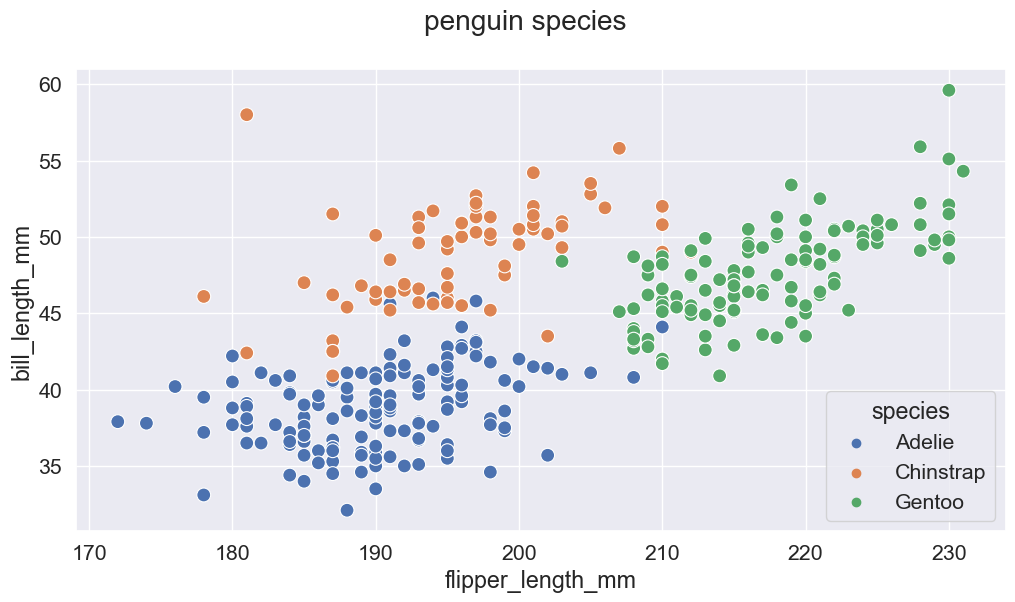

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df_penguin = sns.load_dataset('penguins')

df_penguin.dropna(axis=0, how='any', inplace=True)

sns.set(font_scale=1.4)

# 
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', hue='species', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('penguin species');

Text(0.5, 0.98, 'penguins (what is their subgroups membership?)')

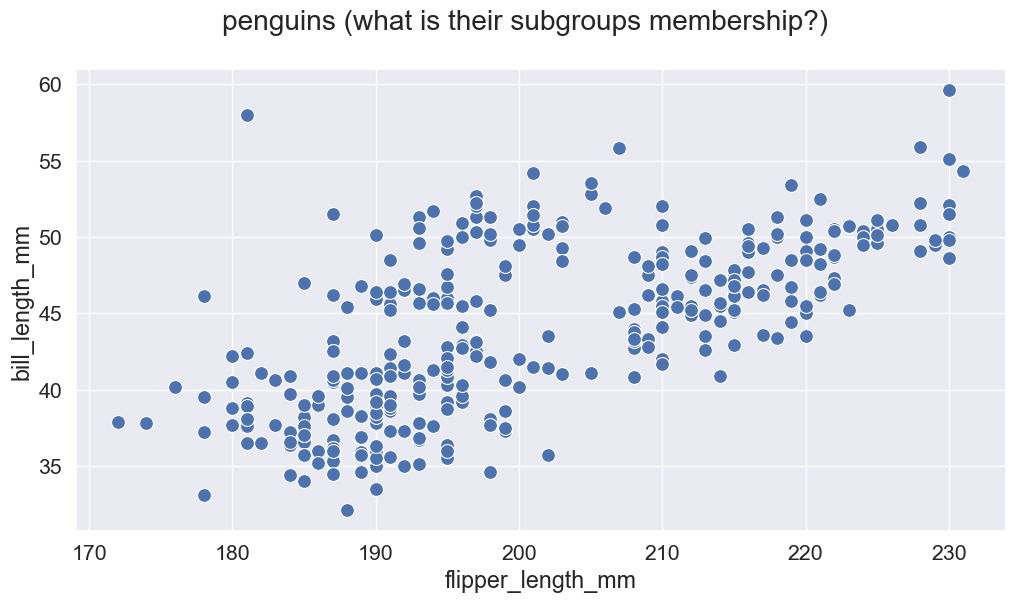

In [6]:
sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('penguins (what is their subgroups membership?)')

## Clustering examples:
Clustering partitions a set of samples into clusters with similar characteristics:

- **Disease characterization**
    - Given a population of clinical features of people with Schizophrenia:
        - severeity of symptoms
        - clinical scores
            - physical, emotional, cognitive symptoms
        - brain imaging
        - disease progression
            - age onset
    - Maybe we can identify k distinct sub-types of "Schizophrenia".  (Is it really one disease or maybe it is many diseases which science cannot yet distinguish?)
    
- **Network Analysis**
    - Given a measure of distance between users in a social network:
        - number of messages between each pair of users
    - can we identify cliques?
        - clique: subgroups of people who often communicate with each other
    
- **Email filtering**
    - Given features about email
        - domain of sender
        - user response time
        - keyword inclusion
            - ✔️𝐀𝐂𝐓 𝐍𝐎𝐖, 𝖦𝖾𝗍 $𝟤𝟧𝟢,𝟢𝟢𝟢 𝗈𝖿 𝖳𝖾𝗋𝗆 𝖫𝗂𝖿𝖾 𝖢𝗈𝗏𝖾𝗋𝖺𝗀𝖾 𝖺𝗌 𝗅𝗈𝗐 𝖺𝗌 $𝟣𝟧/𝖬𝗈👀
    - Can we identify subgroups of email to automatically sort them for users?
        - personal email
        - professional email
        - spam
        - some other group of emails which is user specific

- **Athlete Types**
    - Given features about players of a sport/athletes:
        - height, weight, handedness, position
        - performance in the sport
    - Can we identify subgroups of similar players?
        - scorers
        - defenders
        - clutch players
        - supporting players

## Difference between Clustering and Classification

In classification:
 - **we know the groups and are trying to predict if an observation belongs to a specific group**
 
In clustering:
 - **we do not know what sort of groups there may or may not be, but wish to determine which observations are similar to each other (which ones form clusters)**

# K-Means Clustering

Approach:
- alternate between:
    - pick cluster centers (centroids) as the average of all samples in each cluster
    - assign each sample to the closest cluster centroid

## Demo 1
Shows each step above seperately: 

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
 
## Demo 2
Nicer data / interactivity:

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

# K-Means Clustering (detail)

### Approach:
- Decide how many groups/clusters you will need
- Decide the center for the clusters (randomly, K-means++) 
- alternate between:
    - assign each sample to the closest cluster center
    - pick cluster centers as the average of all samples in each cluster
- Until you converge
    
### Q1: How do I pick the initial centroids?
Either:
- randomly
- pick the k-th cluster centroid as the furthest sample from first k-1 centroids

### Q2: How do you measure if your clustering did a good job?

### Q3: Will K-Means eventually stop iterating?

### Q4: How do I pick a K which is best for my data?

# Q2: How do we measure how good the clustering is?

Bad clustering (lines from samples to centroids are long)
<img src="https://i.ibb.co/Qj6sxVz/cluster-bad.png" width=300px>

Good clustering (lines from samples to centroids are short)
<img src="https://i.ibb.co/2gmCmcV/cluster-good.png" width=300px>

A good clustering gives centroids which are close to each of the samples which belong to its cluster.

We can quantify the quality of a clustering by computing the average line length (squared distance from each sample to its centroid):

$$\frac{1}{N} \sum_i \sum_{x_j \in i} ||x_j - c_i||^2 $$

where $N$ is the number of observations, $c_i$ is the cluster centroid of cluster $i$ and $x_j \in i$ are all the samples $x_j$ which are in cluster $i$.

# Q3: Will K-Means Clustering eventually stop iterating?

Yes, its garaunteed to!

### Definition:

**"Clustering"**: a particular assignment of samples to k sub-groups

#### Proof Sketch:

##### Idea 1: We'll never return to a particular clustering as we update
K-means approach:
- alternate between:
    - pick cluster centers as the average of all samples in each cluster
        - **this moves cluster centers closer, on average, to the points in their cluster**
    - assign each sample to the closest cluster center
        - **this moves cluster centers closer, on average, to the points in their cluster**

##### Idea 2: There is a finite amount of clusterings 
$N^k$ for $N$ samples and $k$ clusters

##### Putting it together:
Given we can't repeat any of the clusterings, we'll eventually run out and K-means will stop.

## K-means: implementation

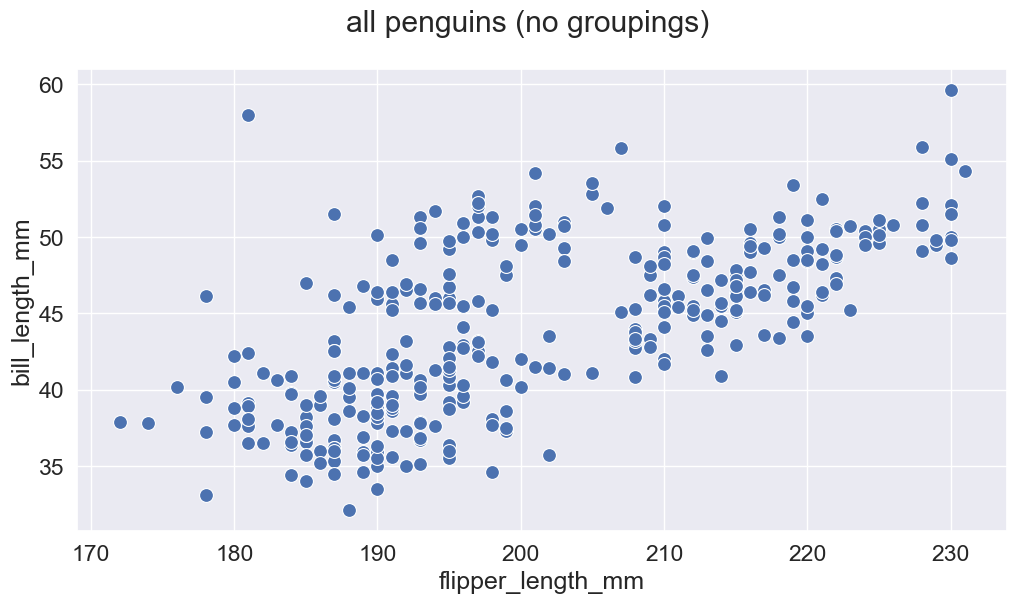

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, how='any', inplace=True)

sns.scatterplot(data=df_penguin, x='flipper_length_mm', y='bill_length_mm', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('all penguins (no groupings)');

C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

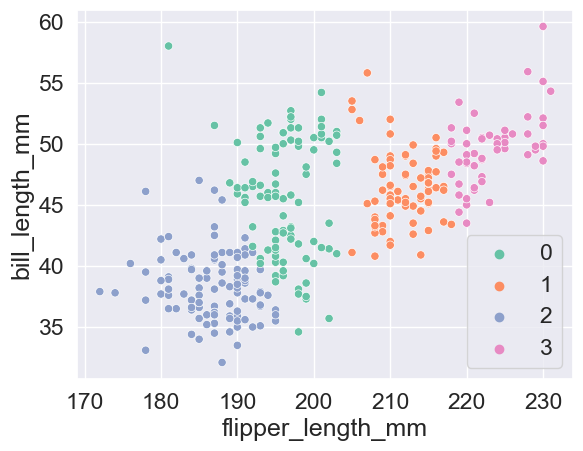

In [12]:
from sklearn.cluster import KMeans

n_clusters = 4

x_feat_list = ['flipper_length_mm', 'bill_length_mm']
x = df_penguin.loc[:, x_feat_list].values

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

sns.scatterplot(data = df_penguin, x = 'flipper_length_mm', y = 'bill_length_mm', hue = y, palette = "Set2")

### Q4: How do I pick a K which is best for my data?

### There is no canonical "right" answer
We can't use Cross Validation in clustering as we don't have access to any ground truth $y$ ... by definition there is no "correct" clustering! In fact, because we know the Species of a penguin, it doesn't make sense to use clustering, we should use classification. What clustering does is tell us: based on the features provided, and the number of clusters, here are the observations which are similar to each other.
    
### How does changing k impact how "good" a clustering is?
Let's observe how our clustering metric changes as $k$ increases:

$$\frac{1}{N} \sum_i \sum_{x_j \in i} ||x_j - c_i||^2 $$

which can be computed via `sklearn` as:

```python
    # kmeans.score() gets the negative mean distance to centroid
    mean_d = -kmeans.score(x)
```


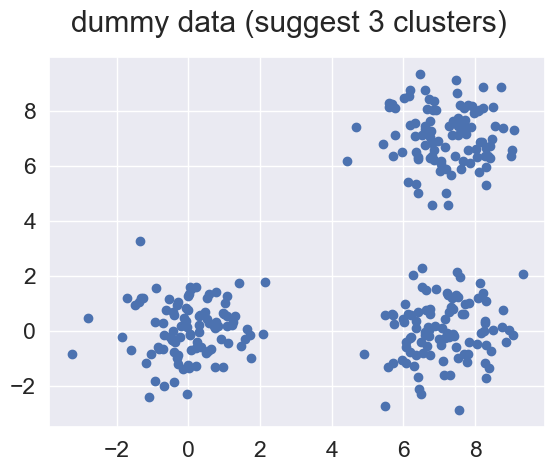

In [13]:
import numpy as np

# we generate dummy data with clean clusters (penguins don't have super clean clusterings)
x = np.vstack([np.random.multivariate_normal(mean=[0, 0], cov=np.eye(2), size=100),
               np.random.multivariate_normal(mean=[7, 0], cov=np.eye(2), size=100),
               np.random.multivariate_normal(mean=[7, 7], cov=np.eye(2), size=100)])

plt.scatter(x[:, 0], x[:, 1])
plt.suptitle('dummy data (suggest 3 clusters)');

C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

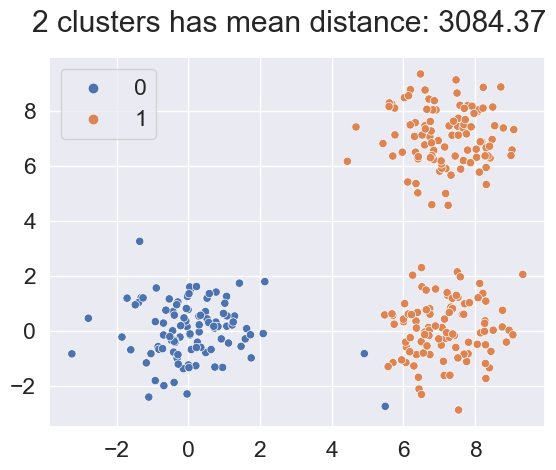

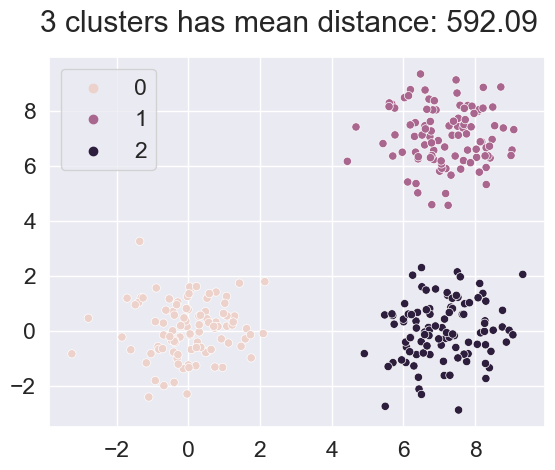

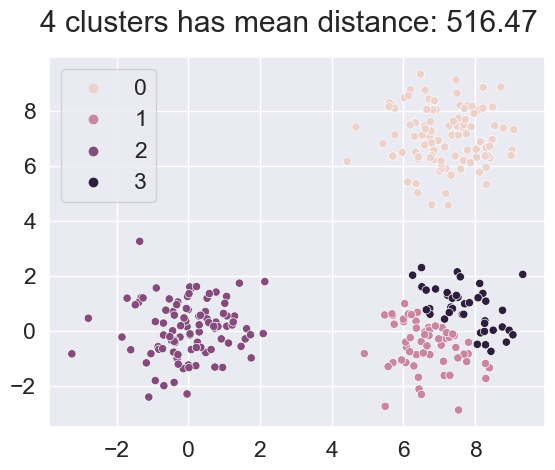

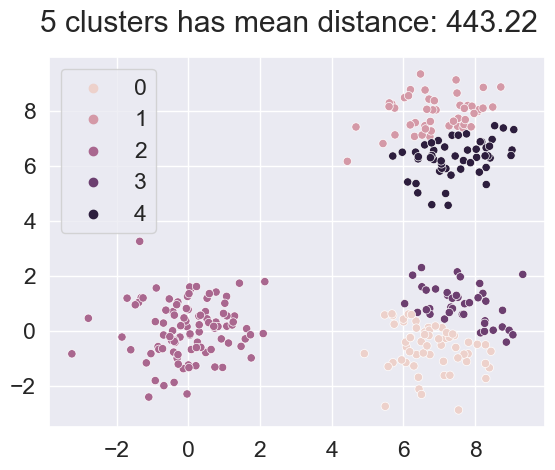

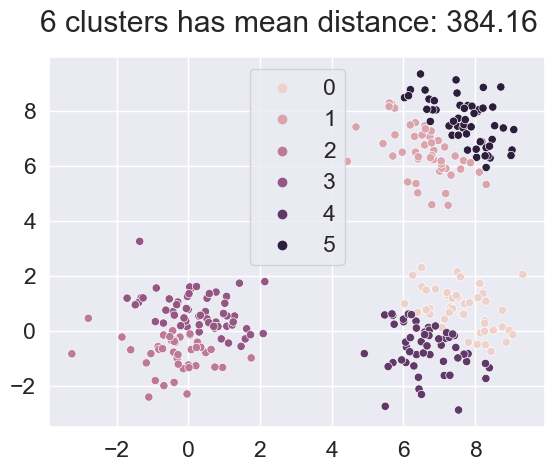

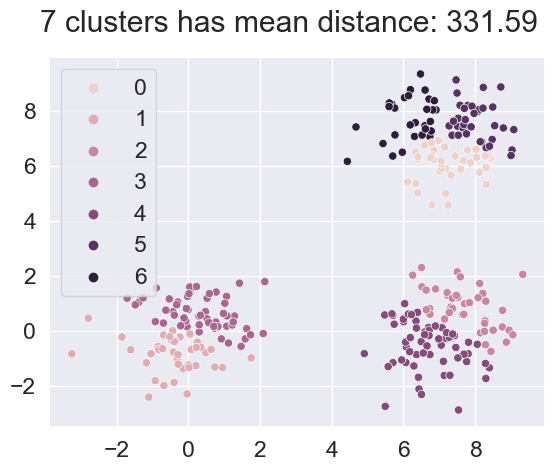

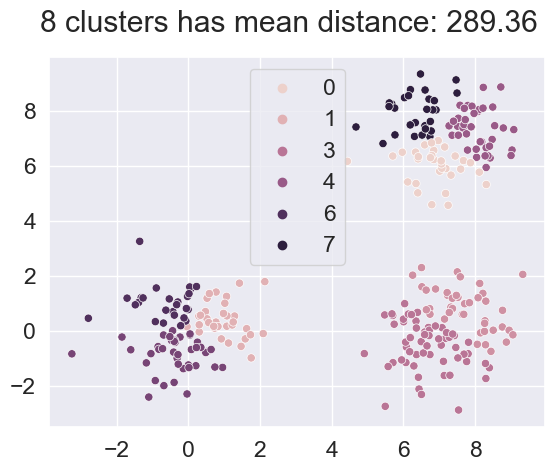

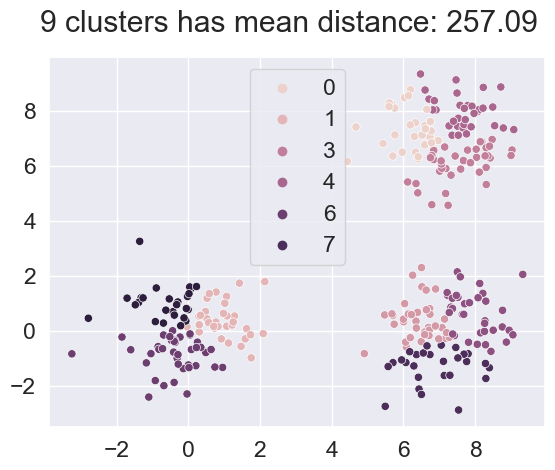

In [16]:
from sklearn.cluster import KMeans

mean_d_dict = dict()

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)

    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

    plt.figure()
    sns.scatterplot(x = x[:,0], y = x[:,1], hue = y)
    plt.suptitle(f'{n_clusters} clusters has mean distance: {mean_d:.2f}')

In [17]:
mean_d_dict

{2: 3084.370536053036,
 3: 592.0909999803226,
 4: 516.46948152578,
 5: 443.2210230216944,
 6: 384.16174955130055,
 7: 331.5858823076662,
 8: 289.3642494663518,
 9: 257.09159883656014}

### Bad News:

As k increases, our mean distance will never go bigger. 

# So how do I choose k then?

    “Everything should be made as simple as possible, but no simpler.” -Einsten ... sort of
    
He actually said [this](https://www.nature.com/articles/d41586-018-05004-4#:~:text=%E2%80%9CEverything%20should%20be%20made%20as,possible%20without%20having%20to%20surrender), but the gist is what's important. How does this help guide us?

"Simple as possible":

- fewest clusters

"No simpler":

- centroids should be close to their samples

Text(0, 0.5, 'mean distance')

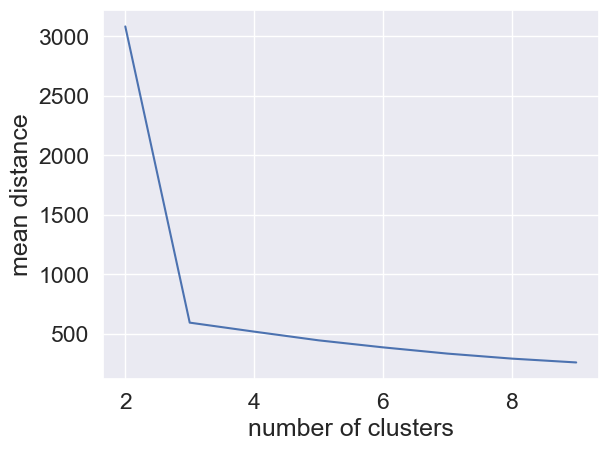

In [19]:
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean distance')

 clusters seems to have a good balance between cluster numner and distance. 

In practice, you may find yourself making an even more subjective decision.  Be rigorous where you can and when you must be subjective, be sure to have a good story / graph handy to explain why your guess is "best".

## Exercise 1

1. Download and use the `really_final_gtky.csv` data set from Canvas and run the below code to read it into python
2. Create a copy of the data frame called `df_gtky_scaled` where you scale normalize the three numeric variables (`prog_exp`, `age`, `start_sal`)
    - Keep the original `df_gtky` for later
3. Using all features except for `student_id`, `class` and `datetimestamp`, run the K-means algorithm for choices of $k$ from 2 to 15. Keep track of the mean-distance and then plot it to find the "elbow" and determine the best choice of $k$.
4. Run the K-means algorithm with your chosen $k$, then add a new column to the original `df_gtky` data frame called `cluster` which has the cluster assignments.
5. Examine the subgroups/clusters in the data and determine what similarities (if any) there are in the specified subgroups.

In [21]:
df_gtky = pd.read_csv("really_final_gtky.csv")
df_gtky.dropna(inplace=True)
df_gtky.head()

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
0,740492,Sophomore,False,9,234.0,60.0,9/9/2022 15:37,True,False,False,False,True
1,20d026,Sophomore,False,7,233.0,100.0,9/9/2022 16:01,True,False,False,False,False
2,e7fc49,Junior,True,7,252.0,70.0,9/9/2022 14:19,True,True,False,True,False
3,a49897,Junior,False,7,243.0,50.0,9/9/2022 16:07,True,True,False,False,False
4,425374,Sophomore,False,5,231.0,90.0,9/9/2022 16:06,True,False,True,False,False


In [23]:
from copy import copy

x_feat_list0 = ['prog_exp', 'age', 'start_sal']
df_gtky_scaled = copy(df_gtky)

for feat in x_feat_list0:
    df_gtky_scaled[feat] = df_gtky_scaled[feat] / df_gtky_scaled[feat].std()

x_feat_list1 = ['co-op', 'prog_exp', 'age', 'start_sal', 'python', 'java', 'r', 'c/c++', 'other(s)']
x = df_gtky_scaled.loc[:, x_feat_list1].values

In [24]:
mean_d_dict = dict()
for n_clusters in range(2,16):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'mean distance')

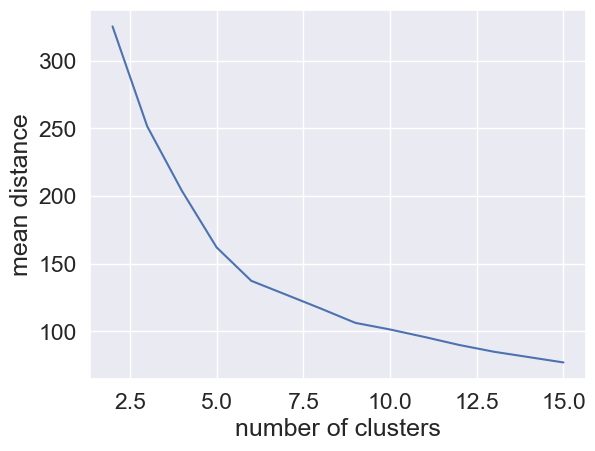

In [25]:
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean distance')

In [27]:
# If I choose cluster number = 6

kmeans = KMeans(n_clusters = 6)
kmeans.fit(x)
y = kmeans.predict(x)
df_gtky['cluster'] = y
df_gtky.head()

C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
0,740492,Sophomore,False,9,234.0,60.0,9/9/2022 15:37,True,False,False,False,True,2
1,20d026,Sophomore,False,7,233.0,100.0,9/9/2022 16:01,True,False,False,False,False,3
2,e7fc49,Junior,True,7,252.0,70.0,9/9/2022 14:19,True,True,False,True,False,1
3,a49897,Junior,False,7,243.0,50.0,9/9/2022 16:07,True,True,False,False,False,3
4,425374,Sophomore,False,5,231.0,90.0,9/9/2022 16:06,True,False,True,False,False,3


In [28]:
cluster_bool = df_gtky['cluster'] == 0
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
6,acca05,Senior,True,7,258.0,90.000,9/9/2022 14:16,True,False,False,False,False,0
7,d2f643,Fifth year,True,3,264.0,45.517,9/9/2022 16:06,False,True,False,False,True,0
12,bb4214,Senior,True,6,257.0,45.517,9/9/2022 14:14,True,False,False,False,False,0
21,f8d4f8,Senior,True,3,265.0,45.517,9/9/2022 15:37,True,False,False,False,False,0
22,63cc25,Senior,True,4,281.0,90.000,9/9/2022 14:06,True,False,False,False,False,0
26,59f171,Fifth year,True,4,266.0,60.000,9/9/2022 14:15,False,True,False,False,False,0
28,a4896d,Junior,True,4,241.0,40.000,9/9/2022 14:14,True,False,True,False,False,0
41,7fe27e,Junior,True,5,242.0,80.000,9/9/2022 14:13,True,False,False,False,False,0
44,e49f6d,Senior,True,7,264.0,100.000,9/9/2022 14:16,True,False,False,False,False,0
45,e20a23,Senior,True,5,257.0,75.000,9/9/2022 13:48,True,False,False,False,False,0


In [29]:
cluster_bool = df_gtky['cluster'] == 1
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
2,e7fc49,Junior,True,7,252.00,70.000,9/9/2022 14:19,True,True,False,True,False,1
9,2a4611,Junior,True,10,240.00,100.000,9/9/2022 14:13,True,True,True,True,False,1
10,f519a9,Fifth year,True,10,276.00,120.000,9/9/2022 14:15,True,True,False,True,False,1
13,911f42,Senior,True,8,265.25,45.517,9/9/2022 13:58,True,True,True,True,False,1
17,baba1d,Junior,False,10,256.00,100.000,9/9/2022 14:13,True,True,False,True,False,1
19,ebda2d,Junior,True,10,247.00,100.000,9/9/2022 14:14,True,True,False,False,True,1
24,910d37,Junior,True,8,254.00,65.000,9/9/2022 15:41,True,True,False,True,False,1
30,5202c5,Fifth year,True,9,270.00,80.000,9/9/2022 14:17,True,True,False,False,False,1
32,65434c,Senior,True,7,264.00,100.000,9/9/2022 16:07,True,True,True,False,False,1
34,29eb93,Senior,True,9,251.00,80.000,9/9/2022 16:07,True,False,False,False,False,1


In [30]:
cluster_bool = df_gtky['cluster'] == 2
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
0,740492,Sophomore,False,9,234.0,60.000,9/9/2022 15:37,True,False,False,False,True,2
5,9e07b3,Junior,False,8,245.0,70.000,9/9/2022 15:27,True,True,False,False,False,2
8,5e75d5,Sophomore,False,10,232.0,58.000,9/9/2022 16:07,False,True,True,False,False,2
18,2c6848,Sophomore,False,10,231.0,100.000,9/9/2022 15:55,True,True,False,False,False,2
31,80d273,Sophomore,False,8,229.0,75.000,9/9/2022 13:45,True,True,True,False,False,2
33,87736b,Sophomore,False,8,235.0,45.517,9/9/2022 14:13,True,True,False,False,False,2
37,b31f5a,Sophomore,False,9,234.0,90.000,9/9/2022 16:06,True,True,False,False,False,2
38,2b8e04,Sophomore,False,8,232.0,80.000,9/9/2022 16:06,True,True,True,False,False,2
39,a000f2,Sophomore,False,10,230.0,100.000,9/9/2022 14:15,True,True,False,True,False,2
40,fdc1ce,Sophomore,False,8,232.0,165.000,9/9/2022 16:04,True,True,False,False,False,2


In [31]:
cluster_bool = df_gtky['cluster'] == 3
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
1,20d026,Sophomore,False,7,233.0,100.000,9/9/2022 16:01,True,False,False,False,False,3
3,a49897,Junior,False,7,243.0,50.000,9/9/2022 16:07,True,True,False,False,False,3
4,425374,Sophomore,False,5,231.0,90.000,9/9/2022 16:06,True,False,True,False,False,3
11,aa2fc7,Sophomore,False,5,230.0,80.000,9/9/2022 16:07,True,False,False,False,False,3
14,708181,Sophomore,False,6,239.0,85.000,9/9/2022 14:13,True,False,False,False,True,3
15,d2f13f,Sophomore,False,7,232.0,90.000,9/9/2022 15:35,True,True,True,False,False,3
20,f54fee,Sophomore,False,7,232.0,80.000,9/9/2022 16:08,False,True,True,True,True,3
23,6.20E+66,Sophomore,False,6,238.0,82.500,9/9/2022 15:45,True,True,False,False,False,3
27,fb2989,Sophomore,False,6,230.0,100.000,9/9/2022 13:39,False,True,False,False,False,3
29,923448,Sophomore,False,7,235.0,80.000,9/9/2022 14:16,False,True,False,False,False,3


In [32]:
cluster_bool = df_gtky['cluster'] == 4
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
55,2b6b69,Sophomore,False,10,230.0,500.0,9/9/2022 15:38,True,True,False,False,True,4


In [33]:
cluster_bool = df_gtky['cluster'] == 5
df_gtky.loc[cluster_bool,:]

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s),cluster
25,6e7251,Faculty,False,8,381.0,100.0,8/30/2022 13:49,True,True,True,False,False,5


### Hierarchical clustering 

K-means clustering may generate unstable result. Is there any way that we can get a unique solution on the clustering? Try the hierarchical clustering. 

Following is small dataset with crime related information for all 50 states plus D.C. in US. Try to
perfrom the clustering on the data to see which states are similar to each other.

In [36]:
import pandas as pd
crime = pd.read_csv('us_statewide_crime.csv')
crime = crime.set_index('State')
crime.head()

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
State,,,,,,,,
Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7


Before we do any other steps, let's scale the data first since the clustering always need to use the distance between observations. 

In [37]:
crime_scaled = copy(crime)

for feat in crime_scaled.columns:
    crime_scaled[feat] = crime_scaled[feat]/crime_scaled[feat].std()

In [38]:
crime_scaled

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
State,,,,,,,,
Alabama,2.013270,1.282292,4.859537,19.705126,4.376416,6.076428,4.719325,3.366732
Alaska,2.348815,0.745116,2.776878,22.985077,6.028299,5.422043,6.771206,1.995100
Arizona,2.203826,1.212979,4.462840,21.637500,5.277443,5.492156,4.001167,4.215608
Arkansas,1.843426,1.091681,5.223176,20.773017,3.947356,5.772606,4.514137,2.349998
California,2.576654,1.057025,4.628130,20.645887,5.899581,5.094851,5.027107,4.637649
Colorado,1.383605,0.537176,2.809936,22.807095,7.422746,4.861142,2.770039,4.028568
Connecticut,1.346322,0.502520,2.545472,22.425705,6.779155,5.351931,2.359663,4.584894
Delaware,2.833491,0.554505,3.272749,21.891760,5.148725,5.982944,4.103761,3.903874
District of Columbia,6.246936,7.243218,5.752105,21.154407,8.216507,10.446782,5.950453,4.795914


This is a small dataset, with only 50 observations. Therefore, technically we can calculate the distance between each pair of the observation and pick out the states that are most similar with each other. Then, repeat the process. 

<div align="center">
<img src="https://i.ibb.co/Q89Sdt2/Diagram.png" alt="Diagram" width = 400px>
</div>

Like in the K-means or KNN, you have multiple choices with distances:
- Euclidean distance
- Manhattan distance

However, how to calculate the distance between two clusters?
- Single linkage (Minimum linkage)
- Complete linkage (Maximum linkage)
- Average linkage (UPGMA: Unweighted Pair Group Method with Arithmetic Mean)
- Centroid linkage
- Ward: the increase in the “error sum of squares” (ESS) after fusing two clusters into a single cluster

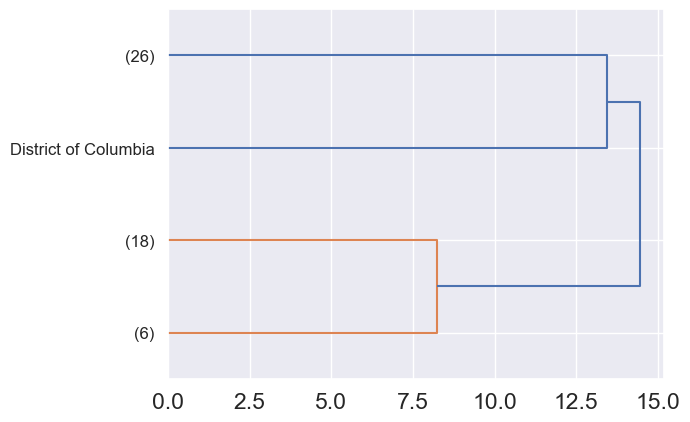

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(crime_scaled, method = 'ward')

#dendrogram(Z, labels = crime_scaled.index, orientation = 'right')
#dendrogram(Z, labels = crime_scaled.index, orientation = 'right', color_threshold = 7.5)
#dendrogram(Z, labels = crime_scaled.index, orientation = 'right', truncate_mode = 'level', p = 4)
dendrogram(Z, labels = crime_scaled.index, orientation = 'right', truncate_mode = 'lastp', p = 4)
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [49]:
y_hc = hc.fit_predict(crime_scaled)
y_hc

array([1, 0, 1, 4, 1, 3, 3, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 4, 0, 3, 3,
       1, 0, 4, 1, 0, 0, 1, 0, 3, 4, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 3, 0, 4, 0, 0], dtype=int64)

In [50]:
crime['cluster'] = y_hc
crime.head()

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2,1
Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6,0
Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9,1
Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0,4
California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7,1


In [52]:
crime_bool = crime['cluster'] == 0
crime.loc[crime_bool,:]

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6,0
Hawaii,244,2.9,10.6,87.4,26.3,19.1,4.3,72.9,0
Idaho,253,1.2,13.3,86.2,20.0,17.7,4.9,38.6,0
Iowa,266,1.6,7.9,89.7,25.5,19.8,2.6,44.9,0
Kansas,389,6.3,10.5,88.1,27.3,20.2,3.7,56.8,0
Maine,110,1.2,9.8,89.3,24.1,23.7,3.5,36.3,0
Minnesota,281,3.1,7.9,90.8,31.2,19.6,3.3,70.3,0
Montana,241,1.8,16.0,89.6,23.8,21.4,4.9,33.4,0
Nebraska,328,3.7,10.7,90.4,24.6,19.6,3.0,52.2,0


In [53]:
crime_bool = crime['cluster'] == 1
crime.loc[crime_bool,:]

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2,1
Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9,1
California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7,1
Delaware,684,3.2,9.9,86.1,24.0,25.6,4.0,81.4,1
Florida,812,5.6,12.0,84.0,22.8,26.5,3.6,93.0,1
Georgia,505,8.0,12.5,82.6,23.1,25.5,3.7,69.1,1
Illinois,657,7.2,10.5,85.5,27.1,21.9,4.4,84.5,1
Indiana,349,5.8,8.3,84.6,17.1,22.8,3.2,71.8,1
Michigan,555,6.7,10.2,86.2,23.0,24.5,3.6,82.5,1


In [54]:
crime_bool = crime['cluster'] == 2
crime.loc[crime_bool,:]

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
District of Columbia,1508,41.8,17.4,83.2,38.3,44.7,5.8,100.0,2


In [55]:
crime_bool = crime['cluster'] == 3
crime.loc[crime_bool,:]

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
Colorado,334,3.1,8.5,89.7,34.6,20.8,2.7,84.0,3
Connecticut,325,2.9,7.7,88.2,31.6,22.9,2.3,95.6,3
Maryland,787,8.1,7.3,85.7,32.3,24.5,3.9,92.7,3
Massachusetts,476,2.0,10.2,85.1,32.7,22.8,2.6,92.1,3
New Jersey,384,3.4,8.1,87.3,30.1,20.2,3.8,100.0,3
Virginia,282,5.7,8.1,86.6,31.9,22.2,2.2,78.2,3


In [56]:
crime_bool = crime['cluster'] == 4
crime.loc[crime_bool,:]

,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,cluster
State,,,,,,,,,
Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0,4
Kentucky,295,4.8,12.5,78.7,20.5,23.2,4.1,48.4,4
Lousiana,681,12.5,18.5,80.8,22.5,29.3,5.5,75.2,4
Mississippi,361,9.0,15.5,80.3,18.7,30.0,5.7,36.2,4
New Mexico,758,7.4,19.3,82.2,23.6,26.6,4.9,57.0,4
West Virginia,317,2.5,15.8,77.1,15.3,22.3,5.5,41.9,4


### Another metrics on the clustering: Silhouette Score

The Silhouette Score is a metric used to measures the separation between clusters. The Silhouette Score provides a value that ranges from -1 (poor clustering) to +1 (well clustering). The formula to calculate the Silhouette Score for a single data point i is as follows:
$$ S_i = \frac{b_i - a_i}{max(a_i,b_i)}$$

Where
- $S_i$ is Silhouette Score for the data point i
- $a_i$ is average distance from all from data point i to all other data points in the same cluster (intra-cluster distance).
- $b_i$ is the smallest average distance from data point i to all data points in a different cluster (inter-cluster distance).

To calculate the overall Silhouette Score for the entire dataset, you can
compute the average Silhouette Score over all data points.

In [58]:
from sklearn.metrics import silhouette_score

silhouette_score(crime_scaled, y_hc)

0.21947540648730401

### Exercise 2

Perfrom the K-means clustering on the crime data. Use Silhouette score to find the best K and interpret the result. 

In [60]:
from sklearn.cluster import KMeans

cluster_num = list(range(2,11))
score_list = list()

for k in cluster_num:
    kmeans = KMeans(n_clusters = k, n_init = k)
    kmeans.fit(crime_scaled)
    y_pred = kmeans.predict(crime_scaled)
    score_list.append(silhouette_score(crime_scaled,y_pred))

C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yangx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

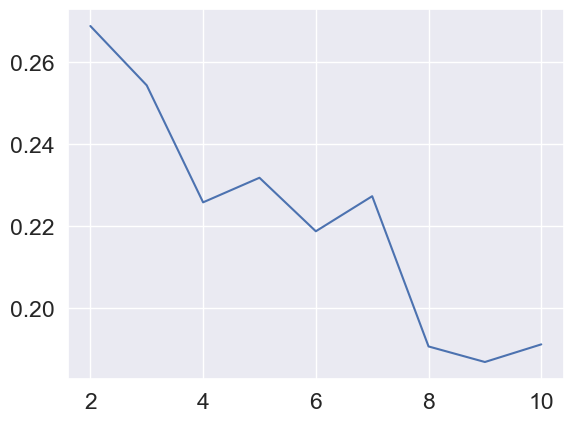

In [61]:
plt.plot(cluster_num, score_list)